In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [9]:
final_data = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/final_data.csv')
final_data.head(5)

,country,year,growth_rate,population,birth_rate,death_rate,gdp,child_mortality,income,continent
0,Albania,1990,1.800,32.8,24.789,5.989,64.0,40.0,4.56,Europe
1,Albania,1991,-0.603,32.8,24.171,6.078,45.1,38.3,3.23,Europe
2,Albania,1992,-0.606,32.4,23.460,6.160,41.8,36.9,3.01,Europe
3,Albania,1993,-0.610,31.9,22.680,6.223,45.8,35.5,3.32,Europe
4,Albania,1994,-0.614,31.4,21.845,6.258,49.7,34.2,3.62,Europe


In [4]:
# Create Autoregressive variables and conduct initial regression

final_data["year"] = final_data["year"].astype(int)
# final_drop['food'] = final_drop['food'].astype(int)
final_data_copy = final_data[['country','year','growth_rate']]
final_data["yr_pred"] = final_data["year"]+1
final_data2 = pd.merge(final_data, final_data_copy, how='left', left_on=['country','yr_pred'], right_on=['country', 'year'])
del final_data2['year_y']
final_data2.rename(columns={'year_x':'year','growth_rate_x':'growth_rate','growth_rate_y':'growth_rate_2'}, inplace=True)
final_data2["year_norm"] = final_data2['year']-1990
pred_2017 = final_data2[(final_data2.year == 2017)]
x2017data = final_data2[(final_data2.year != 2017)]
x2017data


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
# + population
est = smf.ols('growth_rate_2 ~ growth_rate + birth_rate + death_rate + gdp + child_mortality + income + year_norm', x2017data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          growth_rate_2   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5862.
Date:                Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:02:40   Log-Likelihood:                -2075.1
No. Observations:                3834   AIC:                             4166.
Df Residuals:                    3826   BIC:                             4216.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1058      0.041     -2.585      0.010      -0.186      -0.026
growth_rate         0.8593      0.008    106.452      0.000       0.843       0.875
birth_rate          0.0122      0.002      7.535      0.000       0.009       0.015
death_rate         -0.0205      0.003     -6.558      0.000      -0.027      -0.014
gdp             -1.217e-06   9.69e-07     -1.256      0.209   -3.12e-06    6.82e-07
child_mortality     0.0016      0.000      4.305      0.000       0.001       0.002
income              0.0061      0.001     10.286      0.000       0.005       0.007
year_norm           0.0025      0.001      2.802      0.005       0.001       0.004
==============================================================================
Omnibus:                     1299.310   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416923.144
Skew:                          -0.010   Prob(JB):                         0.00
Kurtosis:                      54.087   Cond. No.                     4.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#KMeans Clustering Algorithm

from sklearn.cluster import KMeans
data_agg = x2017data.groupby('country')["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm"].mean().reset_index()
X = data_agg[['growth_rate','child_mortality','income']]
kmeans = KMeans(n_clusters=20)  
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
data_agg['cluster']=kmeans.labels_
cluster = data_agg[['country','cluster']]
fin_data = pd.merge(x2017data, cluster, how='left', left_on=['country'], right_on=['country'])

data_agg.groupby('cluster').count()

[[  1.20774037  30.91851852   5.47362963]
 [  4.00740741 139.55555556  19.53474074]
 [  1.95850926  83.49074074   2.31019907]
 [  0.60475683   5.24259259  37.49232804]
 [  3.0908642  169.88888889   3.2637037 ]
 [  0.40798324  13.41191626  13.63164251]
 [  2.39853086 103.01646091   2.16938272]
 [  1.35018519   4.67283951  55.58148148]
 [  2.84620988 196.83333333   1.19054321]
 [  2.71313426 132.32916667   1.47649074]
 [  1.71794444  62.96018519   9.70111111]
 [  3.88464815   7.67037037  84.13888889]
 [  0.63924715   7.03666667  25.39      ]
 [  1.28506061  23.12962963   8.62434343]
 [  2.58196914 156.23518519   0.99038272]
 [  1.36034759  49.60740741   5.57234568]
 [  1.09335698  32.85802469  14.87018519]
 [  1.98600457  73.26049383   5.98160494]
 [  3.37728889  17.76419753  43.18518519]
 [  1.99055556  39.57777778   7.37166667]]
[13 16  4  5  5  0  3  3 10 18  2  5  5  3 13  9 17  5 10 16  5 14  9  2
  9  3 14  4  5  0 13  6  5  5  5 12  3 19  0  0  1 12  9 13  3  3 17  0
  3  2 12  5 

,country,growth_rate,birth_rate,death_rate,gdp,child_mortality,income,year_norm
cluster,,,,,,,,
0,10,10,10,10,10,10,10,10
1,1,1,1,1,1,1,1,1
2,8,8,8,8,8,8,8,8
3,14,14,14,14,14,14,14,14
4,3,3,3,3,3,3,3,3
5,23,23,23,23,23,23,23,23
6,9,9,9,9,9,9,9,9
7,3,3,3,3,3,3,3,3
8,3,3,3,3,3,3,3,3


<IPython.core.display.Javascript object>


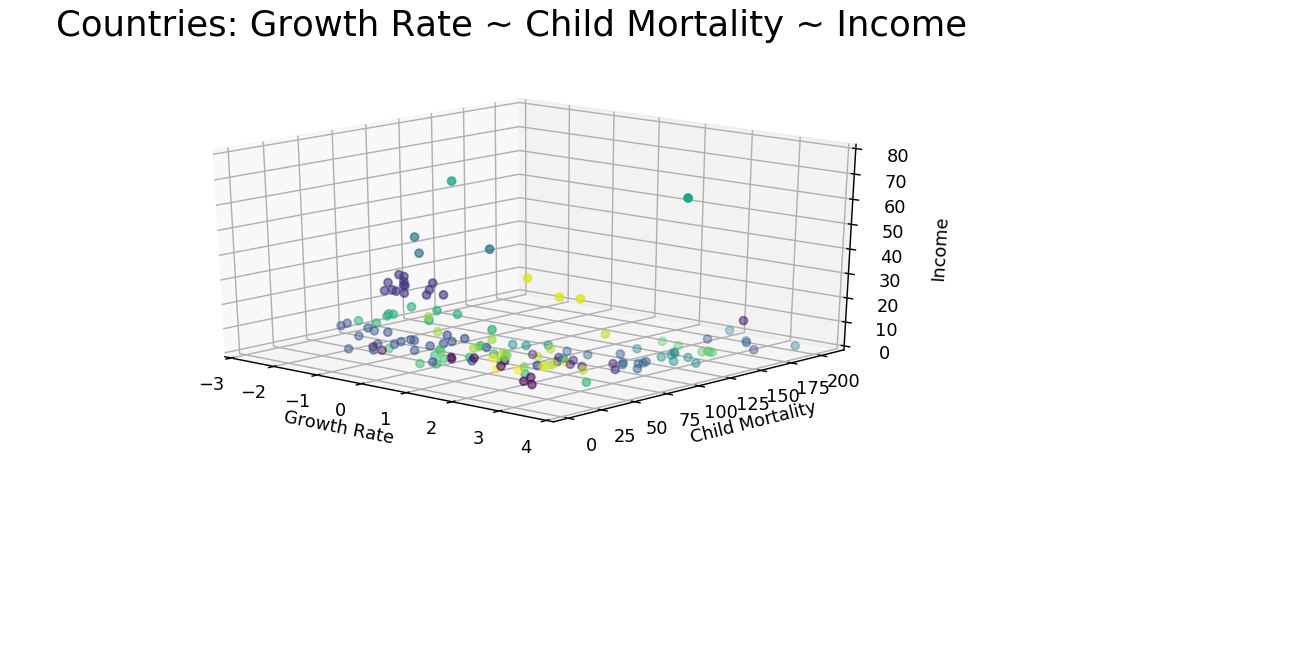

(0, 80)

In [6]:
# Create KMeans Scatter plot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
%matplotlib notebook

# fig = plt.figure(dpi=200)
# fig.suptitle('Country Clustering: Growth Rate ~ Child Mortality + Income', fontsize=20)

# ax = fig.add_subplot(111, projection='3d')
x=data_agg['growth_rate']
y=data_agg['child_mortality']
z=data_agg['income']

fig = plt.figure()
fig.suptitle('Countries: Growth Rate ~ Child Mortality ~ Income', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z, c=data_agg['cluster'], marker='o')
ax.set_xlabel('Growth Rate')
ax.set_ylabel('Child Mortality')
ax.set_zlabel('Income')
ax.set_xlim(-3,4)
ax.set_zlim(0,80)


In [137]:
# This program runs through every possible number of clusters countries, fits Time Series Models onto each cluster,
# and aggregates results from all Time Series MOdels to output a vector of R-Squared % point lifts overo 
# the baseline model. This program was built to find the optimal number of K our model.

def clusters(i,Z):
    columns = ['year','growth_rate','growth_rate_2','Prediction']
    final_preds = pd.DataFrame(columns=columns)
    while i > 0:
        import statsmodels.formula.api as smf
        import sklearn.linear_model as skl_lm
        print("hell0")
        print(i)
        regr = skl_lm.LinearRegression()
        prddata_clust = Z[(Z.cluster == i-1) & (Z.year != 1995) & (Z.year != 2000) & (Z.year != 2005) & (Z.year != 2010) & (Z.year != 2015)]
        findata_clust = Z[(Z.cluster == i-1)]
        clust_mod = smf.ols('growth_rate_2 ~ growth_rate  + gdp + birth_rate + death_rate + child_mortality + income + year_norm', prddata_clust).fit()
        print("made it here")
        findata_clust['Prediction'] = clust_mod.predict(findata_clust)
        pred_clust = findata_clust[['year','growth_rate','growth_rate_2','Prediction']]
        
        pieces = (final_preds,pred_clust)
        final_preds = pd.concat(pieces, ignore_index = True)
        final_preds = final_preds[final_preds['year'].isin([1995,2000,2005,2010,2015])]
        i -= 1
        
    r_squared_base = (final_preds["growth_rate"].corr(final_preds["growth_rate_2"]))**2
    r_squared_mod = (final_preds["Prediction"].corr(final_preds["growth_rate_2"]))**2
    r_squared_lift = r_squared_mod-r_squared_base
    return r_squared_lift
    


def find_opt_kmean():
    r_squareds = []
    data_agg = x2017data.groupby('country')["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm"].mean().reset_index()
    X = data_agg[['growth_rate','child_mortality','income']]
    for i in range(1,len(data_agg)+1):

        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=i)  
        kmeans.fit(X)
        print(i)
        data_agg['cluster']=kmeans.labels_
        cluster = data_agg[['country','cluster']]
        fin_data = pd.merge(x2017data, cluster, how='left', left_on=['country'], right_on=['country'])

        X = fin_data[["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm","cluster"]]
        y = fin_data[["growth_rate_2",'cluster']]
        
        
        r_squareds.append(clusters(i,fin_data))
        print(r_squareds)
        
        data_agg = x2017data.groupby('country')["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm"].mean().reset_index()
        X = data_agg[['growth_rate','child_mortality','income']]
    return r_squareds



In [138]:
# Run the program created above

x2017data = final_data2[(final_data2.year != 2017)]
find_opt_kmean()

1
hell0
1
made it here
[0.006409925437634856]
2
hell0
2
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655]
3
hell0
3
made it here
hell0
2
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007]
4
hell0
4
made it here
hell0
3


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806]
5
hell0
5
made it here
hell0
4
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099]
6
hell0
6
made it here
hell0
5
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078]
7
hell0
7
made it here
hell0
6
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357]
8
hell0
8
made it here
hell0
7


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127]
9
hell0
9
made it here
hell0
8
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602]
10
hell0
10
made it here
hell0
9


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158]
11
hell0
11
made it here
hell0
10
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656]
12
hell0
12
made it here
hell0
11
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987]
13
hell0
13
made it here
hell0
12


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229]
14
hell0
14
made it here
hell0
13
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264]
15
hell0
15
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475]
16
hell0
16
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303]
17
hell0
17
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584]
18
hell0
18
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177]
19
hell0
19
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138]
20
hell0
20
made it here
hell0
19
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095]
21
hell0
21
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358]
22
hell0
22
made it here
hell0
21
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358, 0.02792432738550721]
23
hell0
23
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358, 0.02792432738550721, 0.03093417931387832]
24
hell0
24
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358, 0.02792432738550721, 0.03093417931387832, 0.030460967934910932]
2

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358, 0.02792432738550721, 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095, 0.028287377613716358,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177, 0.019393130541665138, 0.029989656453439095,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303, 0.018923315438893584, 0.029246640189230177,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475, 0.027451475501343303,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264, 0.025310330379921475,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987, 0.02431094842801229, 0.017629008759472264,

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656, 0.017349334764740987

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.016292919859426158, 0.02402834567222656

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.014006860675270127, 0.011280588445102602, 0.0162

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.01400686067527012

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.010535762303687357, 0.01400686067527012

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.008449004921017078, 0.0105

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.00668047506018099, 0.00844900492101707

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.00463565445064007, 0.006438408562044806, 0.006

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336655, 0.004635654450640

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.0038897821568336

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it here
[0.006409925437634856, 0.003

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it here
hell0
1
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it h

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it here
hell0
2
made it h

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made it here
hell0
4
made it here
hell0
3
made it 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
hell0
5
made i

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made it here
hell0
6
made it here
h

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it here
hell0
8
made it here
hell0
7
made

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
ma

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it here
hell0
10
made it here
hell0
9
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
made it here
hell0
12
made it here
hell0
11
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
made it here
hell0
13
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it here
hell0
15
made it here
hell0
14
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
made it here
hell0
16
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
made it here
hell0
18
made it here
hell0
17
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
made it here
hell0
20
made it here
hell0
19
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
made it here
hell0
21
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
made it here
hell0
22
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it here
hell0
23
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
made it here
hell0
25
made it here
hell0
24
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
made it here
hell0
26
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it here
hell0
28
made it here
hell0
27
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it here
hell0
29
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it here
hell0
31
made it here
hell0
30
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
made it here
hell0
32
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it here
hell0
33
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
made it here
hell0
34
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
made it here
hell0
35
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
made it here
hell0
36
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it here
hell0
37
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
made it here
hell0
38
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
made it here
hell0
39
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
made it here
hell0
40
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
made it here
hell0
41
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it here
hell0
43
made it here
hell0
42
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
made it here
hell0
44
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it here
hell0
46
made it here
hell0
45
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it here
hell0
48
made it here
hell0
47
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it here
hell0
50
made it here
hell0
49
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it here
hell0
52
made it here
hell0
51
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made it here
hell0
53
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55
made it here
hell0
54
made i

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
made it here
hell0
56
made it here
hell0
55


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it here
hell0
57
mad

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0
59
made it here
hell0
58
made it

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell0
60
made it here
hell0

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made it here
hell

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
made it here
hell0
61
made

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
made it here
hell0
62
mad

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
made it here
hell0
63
ma

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here
hell0
64
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here
hell0
65
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it here
hell0
66
made it here

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
67
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it here
hell0
68
made it here
hell0
6

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it here
hell0
69
made it h

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it here
hell0
70
made it 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made it here
hell0
71
made it

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made it here
hell0
72
made i

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made it here
hell0
73
made 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
made it here
hell0
74
made

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here
hell0
75
mad

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
made it here
hell0
76
made it here

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made it here
hell0
77
m

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79
made it here
hell0
78
made 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
80
made it here
hell0
79

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0
81
made it here
hell0
8

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0
82
made it here
hell0


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hell0
84
made it here
hell0
83
made it here
hell0

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
made it here
hel

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
hell0
85
mad

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0
87
made it here
hell0
86
made it here
he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here
hell0

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it here
hell0
89
made it here
hell0
88
made it here


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it here
hell0
90
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it here
hell0
91
made it he

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it here
hell0
92
made it h

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
136
made it here
hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it here
hell0
94
made it here
hell0
93
made it 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



138
made it here
hell0
137
made it here
hell0
136
made it here
hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made it her

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
138
made it here
hell0
137
made it here
hell0
136
made it here
hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made it here
hell0
95
made i

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
139
made it here
hell0
138
made it here
hell0
137
made it here
hell0
136
made it here
hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made it here
hell0
96
made 

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hell0
140
made it here
hell0
139
made it here
hell0
138
made it here
hell0
137
made it here
hell0
136
made it here
hell0
135
made it here
hell0
134
made it here
hell0
133
made it here
hell0
132
made it here
hell0
131
made it here
hell0
130
made it here
hell0
129
made it here
hell0
128
made it here
hell0
127
made it here
hell0
126
made it here
hell0
125
made it here
hell0
124
made it here
hell0
123
made it here
hell0
122
made it here
hell0
121
made it here
hell0
120
made it here
hell0
119
made it here
hell0
118
made it here
hell0
117
made it here
hell0
116
made it here
hell0
115
made it here
hell0
114
made it here
hell0
113
made it here
hell0
112
made it here
hell0
111
made it here
hell0
110
made it here
hell0
109
made it here
hell0
108
made it here
hell0
107
made it here
hell0
106
made it here
hell0
105
made it here
hell0
104
made it here
hell0
103
made it here
hell0
102
made it here
hell0
101
made it here
hell0
100
made it here
hell0
99
made it here
hell0
98
made it here
hell0
97
made

[0.006409925437634856,
 0.0038897821568336655,
 0.00463565445064007,
 0.006438408562044806,
 0.00668047506018099,
 0.008449004921017078,
 0.010535762303687357,
 0.014006860675270127,
 0.011280588445102602,
 0.016292919859426158,
 0.02402834567222656,
 0.017349334764740987,
 0.02431094842801229,
 0.017629008759472264,
 0.025310330379921475,
 0.027451475501343303,
 0.018923315438893584,
 0.029246640189230177,
 0.019393130541665138,
 0.029989656453439095,
 0.028287377613716358,
 0.02792432738550721,
 0.03093417931387832,
 0.030460967934910932,
 0.03072880009308343,
 0.030975574084957325,
 0.03102885927977883,
 0.03124395837838312,
 0.026396069701949743,
 0.03133877496019477,
 0.0329625397477189,
 0.03303443444139764,
 0.03287534505497658,
 0.02700726042402657,
 0.02927380596469431,
 0.030614025748650686,
 0.030798170582378326,
 0.03247006824374288,
 0.029888085571092127,
 0.03509786032658657,
 0.03502750373643404,
 0.03712152292131132,
 0.03352512314841516,
 0.033284045853195776,
 0.03745

In [165]:
# copy and paste the results from the program above into an array to be analyzed

r_squareds = [0.006409925437634856,
 0.0038897821568336655,
 0.00463565445064007,
 0.006438408562044806,
 0.00668047506018099,
 0.008449004921017078,
 0.010535762303687357,
 0.014006860675270127,
 0.011280588445102602,
 0.016292919859426158,
 0.02402834567222656,
 0.017349334764740987,
 0.02431094842801229,
 0.017629008759472264,
 0.025310330379921475,
 0.027451475501343303,
 0.018923315438893584,
 0.029246640189230177,
 0.019393130541665138,
 0.029989656453439095,
 0.028287377613716358,
 0.02792432738550721,
 0.03093417931387832,
 0.030460967934910932,
 0.03072880009308343,
 0.030975574084957325,
 0.03102885927977883,
 0.03124395837838312,
 0.026396069701949743,
 0.03133877496019477,
 0.0329625397477189,
 0.03303443444139764,
 0.03287534505497658,
 0.02700726042402657,
 0.02927380596469431,
 0.030614025748650686,
 0.030798170582378326,
 0.03247006824374288,
 0.029888085571092127,
 0.03509786032658657,
 0.03502750373643404,
 0.03712152292131132,
 0.03352512314841516,
 0.033284045853195776,
 0.037454677925592206,
 0.031437735653612076,
 0.03231130603396948,
 0.035978143053102984,
 0.03458865505274955,
 0.039709505715202154,
 0.03769476721310838,
 0.03771009734928865,
 0.03455110215549806,
 0.03515128131923739,
 0.03951791588754827,
 0.040500801787215934,
 0.0392615215732689,
 0.037808154741681865,
 0.040278814342499136,
 0.042629402919739046,
 0.0404762035540962,
 0.038326861054919115,
 0.04079733865235691,
 0.03898942177251563,
 0.039514012113900376,
 0.04034476215237637,
 0.04395451958987273,
 0.04451200330936189,
 0.03991725594539208,
 0.039619471274087825,
 0.044353734811456325,
 0.04504032520615597,
 0.04396526278504609,
 0.042212813328563525,
 0.045674464201666765,
 0.04218814375245372,
 0.04562658169118128,
 0.046448054318719456,
 0.04591633105512438,
 0.04409255867471529,
 0.04520155890723698,
 0.04596087621495348,
 0.04417134890253982,
 0.04559780988914708,
 0.04357922266753078,
 0.044694530988252934,
 0.044017661199609925,
 0.04601021366711244,
 0.05657009606586094,
 0.04494113245342579,
 0.04185251660843059,
 0.04945466424953082,
 0.04316585303891474,
 0.05667709920824948,
 0.04814457506769532,
 0.04219441595260376,
 0.05415226637985904,
 0.04366330979335398,
 0.04610867370907423,
 0.04731769971266808,
 0.05304599425824008,
 0.05552754012459149,
 0.046121512027010536,
 0.053240651172429154,
 0.053289873008382616,
 0.05469345444359497,
 0.05466557341420508,
 0.05492105016146709,
 0.05493336199287069,
 0.054799073635468654,
 0.054681278423973634,
 0.05515557516179448,
 0.05444554001501423,
 0.055022831682418394,
 0.054679983434055446,
 0.05498044192096807,
 0.0547486642789321,
 0.05502756405640752,
 0.055155786613725555,
 0.05519188751138715,
 0.055465729643546235,
 0.055586208591312025,
 0.055477633699406836,
 0.055895777017838544,
 0.05500899670572046,
 0.0556395956196335,
 0.05486896120181317,
 0.054790434000125954,
 0.054865099143144636,
 0.054892187418706384,
 0.054770384033276276,
 0.05478923595649421,
 0.055796549851960475,
 0.05580389461146018,
 0.05580664569560856,
 0.05577636339712233,
 0.05610465239597284,
 0.056216224326771314,
 0.056236922786485954,
 0.056271427324866785,
 0.0638881149358066,
 0.06389494534171858]

Text(0.5, 1.0, 'Relationship Between Number of KMeans Clusters and Model Performance')

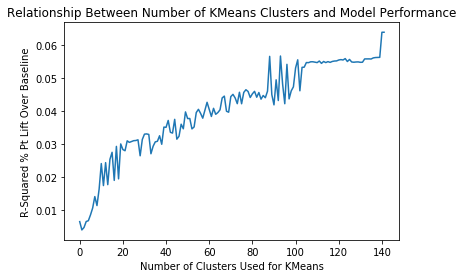

In [168]:
# plot the performance by number of clusters

plt.plot(r_squareds)
plt.xlabel("Number of Clusters Used for KMeans")
plt.ylabel("R-Squared % Pt Lift Over Baseline")
plt.title("Relationship Between Number of KMeans Clusters and Model Performance")

In [7]:
# This program was used to calculate all predictions. THe specific K used must be manually inputted.

def clusters(i,Z,Z2):
    columns = ['country','year','growth_rate','growth_rate_2','Prediction']
    final_preds = pd.DataFrame(columns=columns)
    final_preds2017 = pd.DataFrame(columns=columns)
    while i > 0:
        import statsmodels.formula.api as smf
        import sklearn.linear_model as skl_lm
        print("hell0")
        print(i)
        regr = skl_lm.LinearRegression()
        prddata_clust = Z[(Z.cluster == i-1)]
        findata_clust = Z[(Z.cluster == i-1)]
        findata_clust_2017 = Z2[(Z2.cluster == i-1)]
        clust_mod = smf.ols('growth_rate_2 ~ growth_rate  + gdp + birth_rate + death_rate + child_mortality + income + year_norm', prddata_clust).fit()
        findata_clust['Prediction'] = clust_mod.predict(findata_clust)
        pred_clust = findata_clust[['country','year','growth_rate','growth_rate_2','Prediction']]
        findata_clust_2017["Prediction"] = clust_mod.predict(findata_clust_2017)
        pred_clust_2017 = findata_clust_2017[['country','year','growth_rate','growth_rate_2','Prediction']]
        
        pieces = (final_preds,pred_clust,pred_clust_2017)
        
        final_preds = pd.concat(pieces, ignore_index = True)
#         final_preds2017 = pd.concat(pieces2017, ignore_index = True)
        i -= 1
        
    r_squared_base = (final_preds["growth_rate"].corr(final_preds["growth_rate_2"]))**2
    r_squared_mod = (final_preds["Prediction"].corr(final_preds["growth_rate_2"]))**2
    r_squared_lift = r_squared_mod-r_squared_base
    final_preds.to_csv('/Users/RHedg/Desktop/time_series_pred.csv',index=False)
    print(r_squared_mod)
    return r_squared_lift
    return final_preds
    return final_preds2017
    


r_squareds = []
data_agg = x2017data.groupby('country')["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm"].mean().reset_index()
X = data_agg[['growth_rate','child_mortality','income']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)  
kmeans.fit(X)
data_agg['cluster']=kmeans.labels_
cluster = data_agg[['country','cluster']]
fin_data = pd.merge(x2017data, cluster, how='left', left_on=['country'], right_on=['country'])
fin_data2017 = pd.merge(pred_2017, cluster, how='left', left_on=['country'], right_on=['country'])

X = fin_data[["growth_rate","birth_rate","death_rate","gdp","child_mortality","income","year_norm","cluster"]]
y = fin_data[["growth_rate_2",'cluster']]


clusters(20,fin_data,fin_data2017)
final_preds = final_preds
# final_preds2017 = final_preds2017




hell0
20


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'pieces2017' is not defined

In [149]:
final_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 5 columns):
country          3853 non-null object
year             3853 non-null int32
growth_rate      3853 non-null float64
growth_rate_2    3852 non-null float64
Prediction       3853 non-null float64
dtypes: float64(3), int32(1), object(1)
memory usage: 135.5+ KB


In [ ]:
final_preds.to_csv('/Users/RHedg/Desktop/time_series_pred.csv',index=False)

0.910060398922667


Text(0.5, 1.0, "Relationship Between Consecutive Year's Growth Rates")

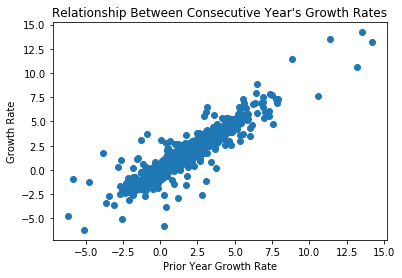

In [164]:
%matplotlib inline
import scipy

corr = (final_data2['growth_rate'].corr(final_data2['growth_rate_2']))**2
print(corr)
plt.scatter(final_data2['growth_rate'], final_data2['growth_rate_2'])
plt.xlabel("Prior Year Growth Rate")
plt.ylabel("Growth Rate")
plt.title("Relationship Between Consecutive Year's Growth Rates")